In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

In [36]:
# Sample dataset
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [37]:
X

,StudyHours,PrevExamScore
0,1,30
1,2,40
2,3,45
3,4,50
4,5,60
5,6,65
6,7,70
7,8,75
8,9,80
9,10,85


In [38]:
y

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: Pass, dtype: int64

In [39]:
# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

In [40]:
X

,const,StudyHours,PrevExamScore
0,1.0,1,30
1,1.0,2,40
2,1.0,3,45
3,1.0,4,50
4,1.0,5,60
5,1.0,6,65
6,1.0,7,70
7,1.0,8,75
8,1.0,9,80
9,1.0,10,85


In [41]:
# Fit the model using Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Display the summary, including p-values for each feature
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pass   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 17 Jul 2025   Prob (F-statistic):            0.00701
Time:                        20:14:42   Log-Likelihood:               -0.17258
No. Observations:                  10   AIC:                             6.345
Df Residuals:                       7   BIC:                             7.253
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3333      1.464     -0.228

In [42]:
# Define a significance level
significance_level = 0.1

# Perform backward elimination
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()
    # Get the highest p-value in the model
    max_p_value = model.pvalues.max()
    
    # Check if the highest p-value is greater than the significance level
    if max_p_value > significance_level:
        # Identify the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        print(f"Removing feature: {feature_to_remove} with p-value: {max_p_value}")
        
        # Drop the feature
        X = X.drop(columns=[feature_to_remove])
    else:
        break

# Display the final model summary
print(model.summary())

Removing feature: PrevExamScore with p-value: 0.9999999999999956
Removing feature: const with p-value: 0.11419580126842216
                                 OLS Regression Results                                
Dep. Variable:                   Pass   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              44.31
Date:                Thu, 17 Jul 2025   Prob (F-statistic):                    9.31e-05
Time:                        20:14:42   Log-Likelihood:                         -1.8294
No. Observations:                  10   AIC:                                      5.659
Df Residuals:                       9   BIC:                                      5.961
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                

In [43]:
X

,StudyHours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [44]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns in the training data
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training numerical data and transform it
X_train_scaled = X_train.copy() # Work on a copy to avoid SettingWithCopyWarning
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# --- 3. Scale the Test Data using the *FITTED* Scaler ---
# Do NOT refit the scaler here! Use transform()
X_test_scaled = X_test.copy() # Work on a copy
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols]) # Use transform!

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# You can also inspect the coefficients
# print("\nModel Coefficients:")
# for feature, coef in zip(X.columns, model.coef_):
#     print(f"{feature}: {coef:.2f}")


Mean Squared Error (MSE): 0.00
R-squared (R2): 0.99


In [45]:
A_train = X_train_scaled.copy()
A_train["salary_in_usd"] = y_train.values

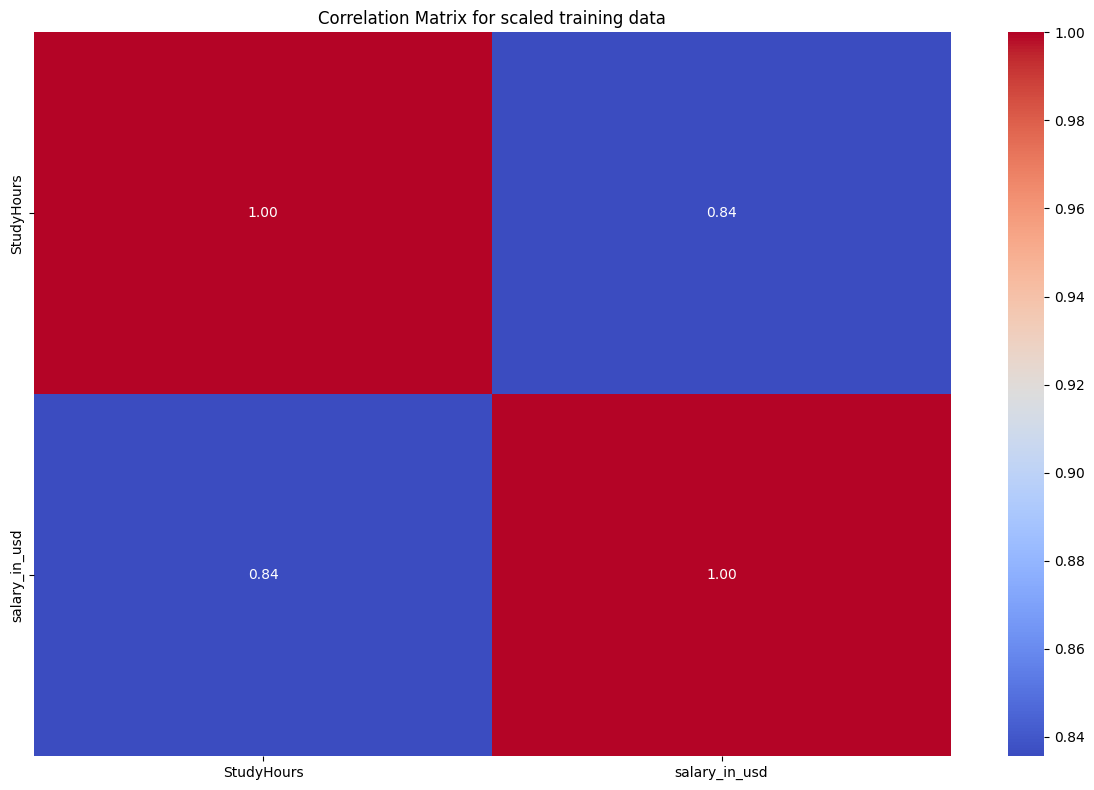

In [46]:
# Display the correlation matrix for X_train_scaled
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = A_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for scaled training data')
plt.tight_layout()
plt.show()